## InfogainLoss

In [2]:
import os
import numpy as np
import os.path

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    # set up Python environment: numpy for numerical routines, and matplotlib for plotting
import h5py
import caffe
from caffe.proto import caffe_pb2
from google.protobuf import text_format
import sensSpec
print("Done importing")

Done importing


### Slicing+Softmax+InfogainLoss

In [8]:
# this is the test net prototxt
model_def = '/mnt/antares_raid/home/cindy/adhara/experiments/19/deploy.prototxt'
# this is where your snapshots are stored, the same as the field defined in solver.prototxt
# during the sens&spec calculation procedure, it creates cache for these values 
# default directory for these cache files is the same as these .caffemodel files.
# but this can be modified in the code 'save_prefix'
snapshot_prefix = '/mnt/raid/dnn/cindy/modelfiles/19/te'
soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']
print_soundTypes = ['alarm', 'baby', 'crash', 'dog', 'engine', 'femS', 'fire',
       'footS', 'knock', 'phone', 'piano']
it_list,sens_list,spec_list,bal_acclist = sensSpec.getSensSpec(model_def,
                                                      soundTypes,
                                                      snapshot_prefix,
                                                      s_prefix='/mnt/raid/dnn/cindy/modelfiles/19/te',
                                                      s_flag=True,
                                                      test_size=23567,
                                                      batch_size=128,
                                                      snapshot=5000,
                                                      max_iter=100000)

20 model files


In [9]:
sensSpec.printResult(print_soundTypes,sens_list,spec_list,bal_acclist)

class 	 sensitivity 	 specificity 	 bal_acc
alarm 	 0.814371 	 0.000613 	 0.407492
baby 	 0.051690 	 0.007674 	 0.029682
crash 	 0.342593 	 0.024531 	 0.183562
dog 	 0.089005 	 0.000773 	 0.044889
engine 	 0.592466 	 0.050037 	 0.321252
femS 	 0.067416 	 0.000214 	 0.033815
fire 	 0.068367 	 0.016300 	 0.042334
footS 	 0.044109 	 0.010261 	 0.027185
knock 	 0.010989 	 0.001611 	 0.006300
phone 	 0.286501 	 0.002402 	 0.144452
piano 	 0.320585 	 0.007635 	 0.164110


SigmoidCrossEntropy without dropout

## plotting

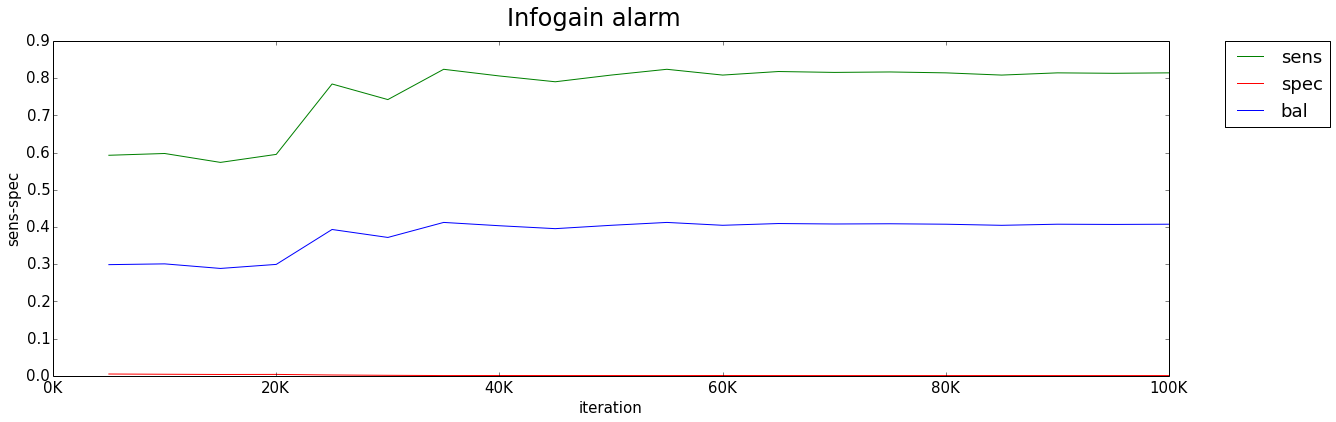

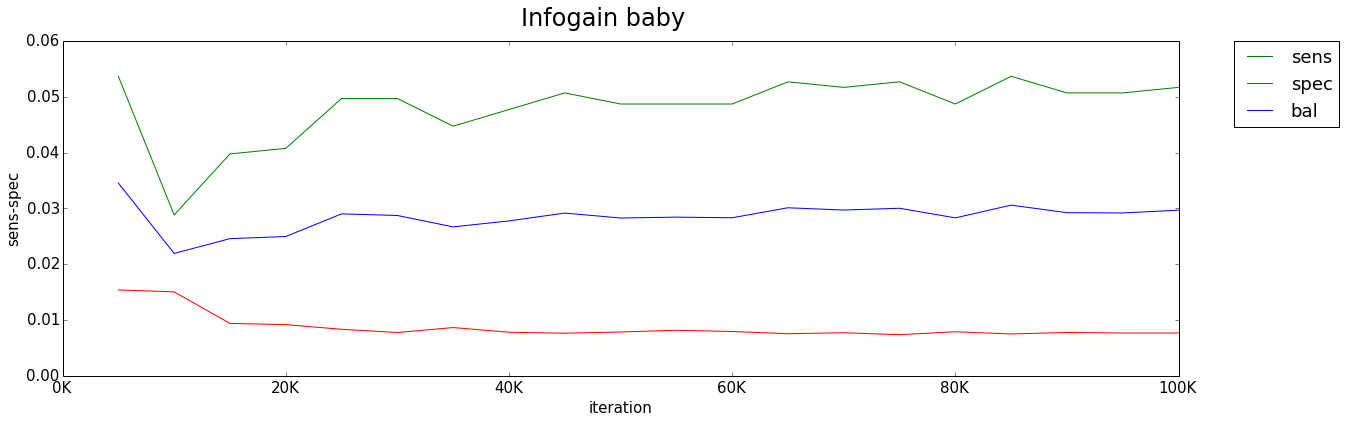

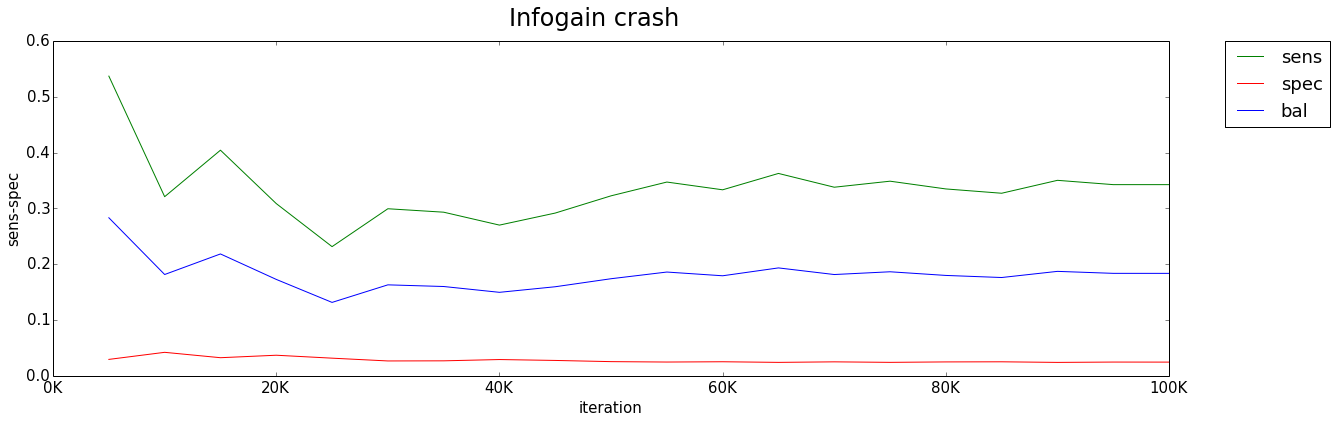

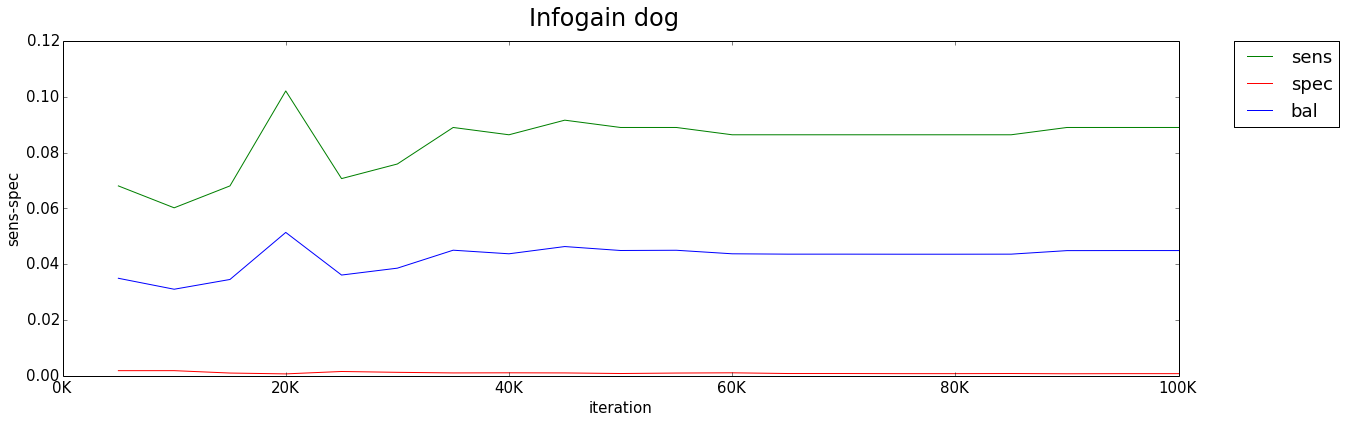

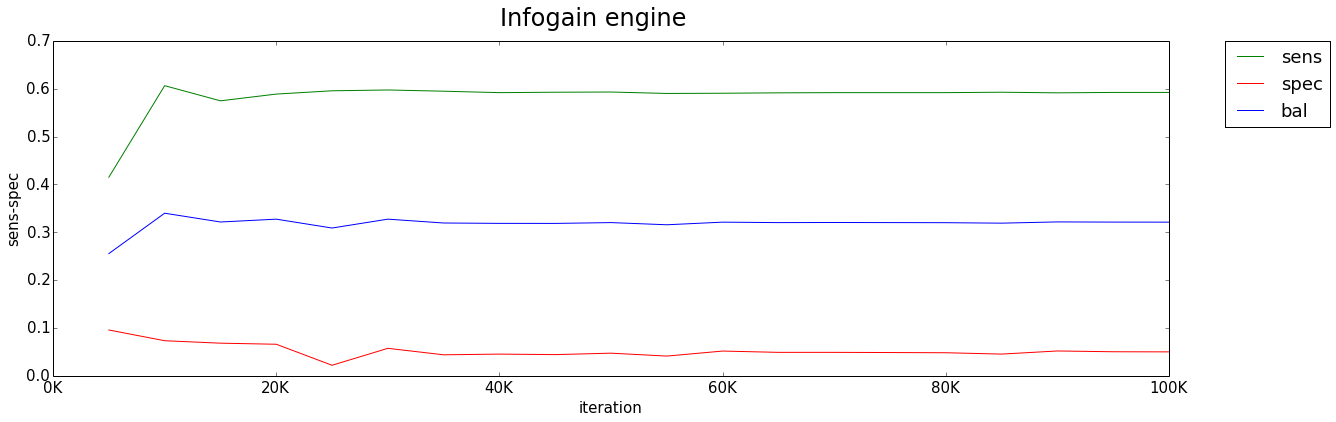

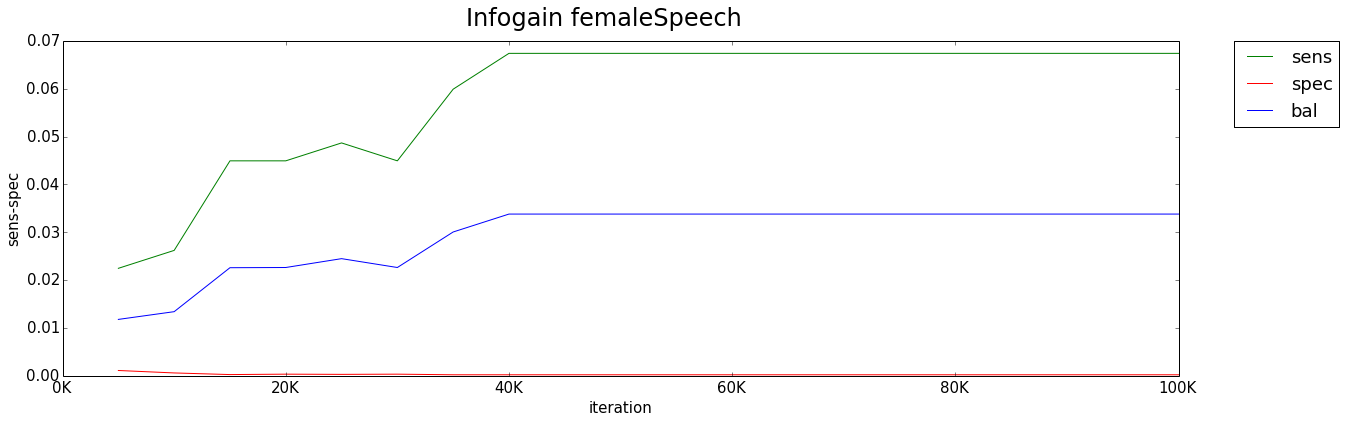

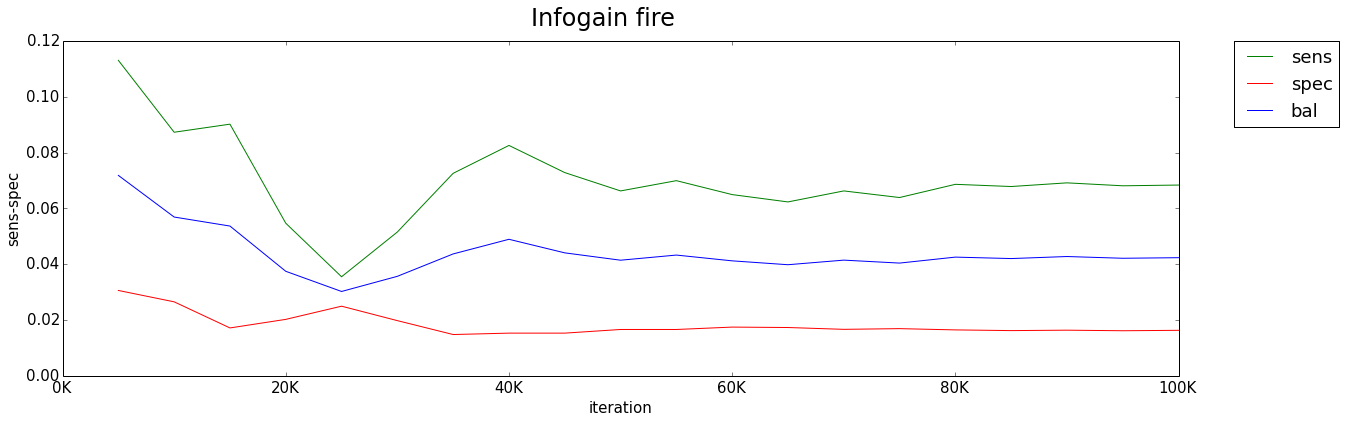

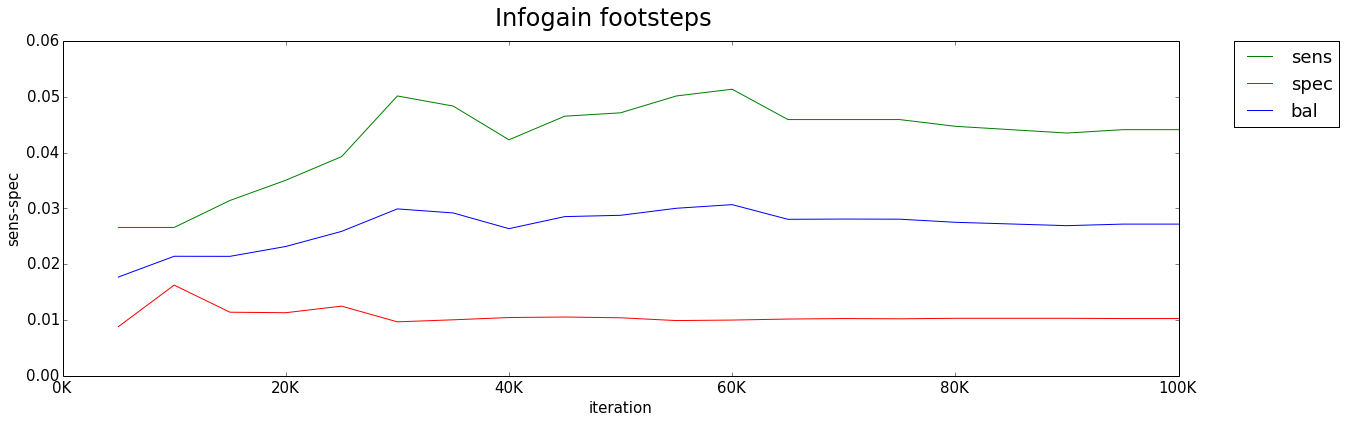

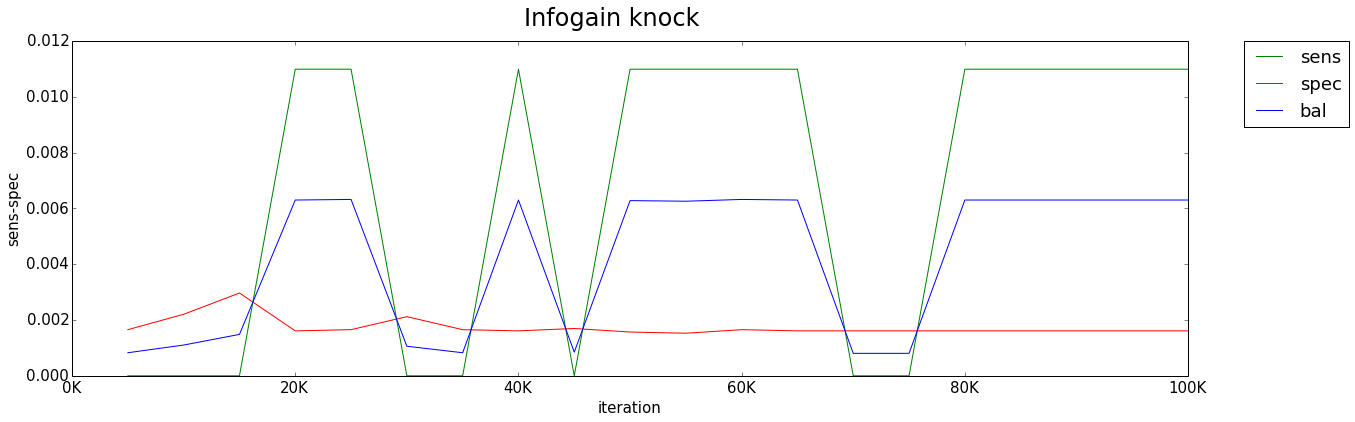

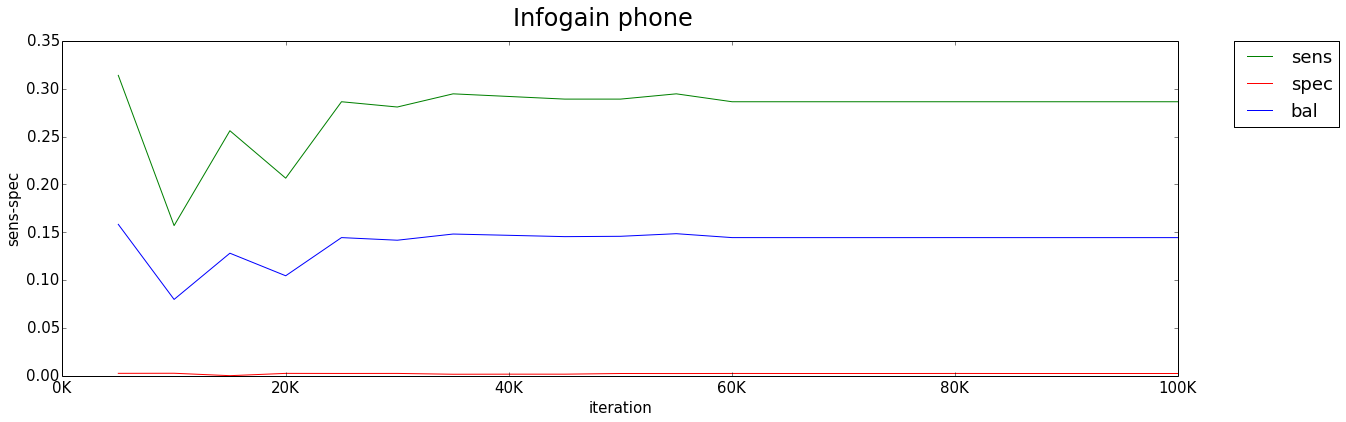

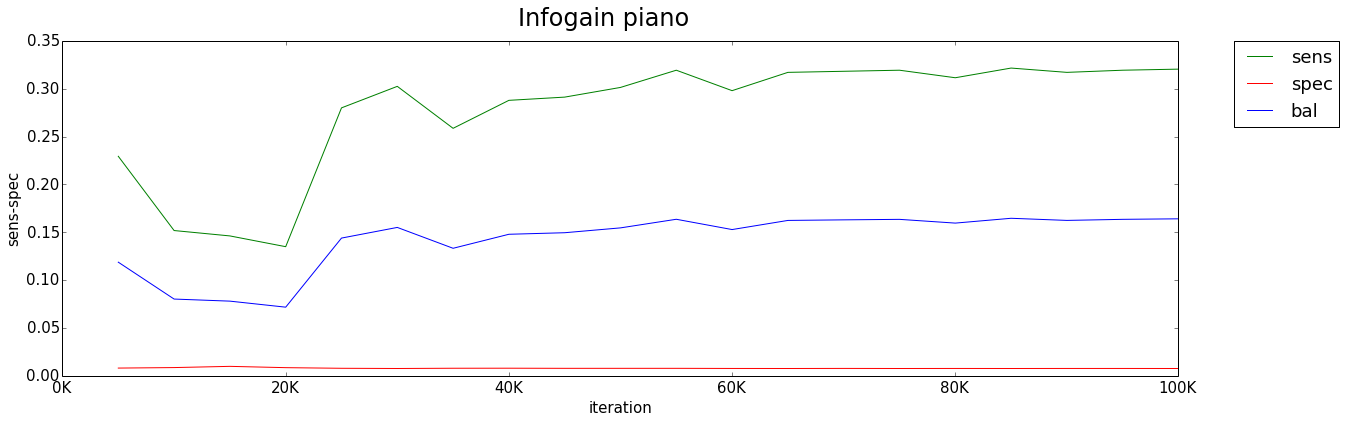

In [12]:
root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/plots/Infogain/'

#####################plot#####################
K = len(soundTypes)  #get number of class labels
for s in range(K):
    plt.figure(figsize=(20,6))
    plt.suptitle('Infogain '+soundTypes[s],fontsize=24)
    
    plt.plot(it_list, sens_list[:,s],color='green',label='sens')
#     plt.plot(it_list_nd, sens_list_nd[:,s],'--',color='green',label='sens-no-dropout')
    
    plt.plot(it_list, spec_list[:,s], color='red',label='spec')
#     plt.plot(it_list_nd, spec_list_nd[:,s], '--',color='red',label='spec-no-dropout')
    
    plt.plot(it_list, bal_acclist[:,s],color='blue',label='bal')
#     plt.plot(it_list_nd, bal_acclist_nd[:,s], '--',color='blue',label='bal-no-dropout')
    
    plt.xlabel('iteration')
    plt.ylabel('sens-spec')
    # format x-axis ticks
    ticks, _ = plt.xticks()
    
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])

#     plt.legend(loc=0,prop={'size':15})
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size':18})

    ########## TODO ###########
    # save the plots under the directory you choose
    plt.savefig(root_path+'acc_measures'+str(s+1).zfill(2)+soundTypes[s]+'.png')
    
#     # print the values from last iteration
#     print 'last iteration acc-measurements for %s'%soundTypes[s]
#     print '\t SCE \t SCE_ndrp '
#     print 'sens \t %f \t %f'%(sens_list_SCE[-1,s],sens_list_SCE_nd[-1,s])
#     print 'spec \t %f \t %f'%(spec_list_SCE[-1,s],spec_list_SCE_nd[-1,s])
#     print 'bal \t %f \t %f'%(bal_acclist_SCE[-1,s],bal_acclist_SCE_nd[-1,s])